# Import important libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data in dataframe
### Once the data is loaded we need to encode the label as 0,1.....45 using sklearn's LabelEncoder

In [2]:
df = pd.read_csv('devanagri.csv')

In [3]:
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [4]:
#No of characters in devanagri class
df.character.unique().shape

(46,)

In [5]:
# encoding the class

from sklearn.preprocessing import LabelEncoder

lab = LabelEncoder()
df['class'] = lab.fit_transform(df.character.values)

In [6]:
df.head()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,character_01_ka,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,character_01_ka,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,character_01_ka,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,character_01_ka,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,character_01_ka,0


In [7]:
X = np.array(df.iloc[:,:1024])/255.0
y = df['class']

## Split the data in train and test using train_test_split from sklearn

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

# Creating the ANN model

#### We use 1 dummy layer i.e. input layer 
#### We use 2 Dense layers with 130 Neurons in 1st layer(hyperparameter) - Activation is ReLu
#### We use 46 Neurons in output layer since we have 46 classes - Activation is Softmax
#### We use Adam optimizer and sparse_categorical_crossentropy as loss function since our label is in form of integers and not probability distributions. The metric we use is accuracy
#### We run our model for 28 epochs.

In [9]:
model = tf.keras.models.Sequential([
           tf.keras.layers.Input(shape = (X_train.shape[1],)),
           tf.keras.layers.Dense(130, activation = 'relu'),
           tf.keras.layers.Dropout(0.2),
           tf.keras.layers.Dense(46, activation = 'softmax')
           ])

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 28)

Epoch 1/28
1927/1927 [==============================] - 6s 3ms/step - loss: 1.8635 - accuracy: 0.5108 - val_loss: 0.8166 - val_accuracy: 0.7776
Epoch 2/28
1927/1927 [==============================] - 5s 3ms/step - loss: 0.8402 - accuracy: 0.7624 - val_loss: 0.5732 - val_accuracy: 0.8406
Epoch 3/28
1927/1927 [==============================] - 5s 3ms/step - loss: 0.6424 - accuracy: 0.8113 - val_loss: 0.4869 - val_accuracy: 0.8646
Epoch 4/28
1927/1927 [==============================] - 5s 3ms/step - loss: 0.5450 - accuracy: 0.8398 - val_loss: 0.4284 - val_accuracy: 0.8805
Epoch 5/28
1927/1927 [==============================] - 5s 3ms/step - loss: 0.4902 - accuracy: 0.8544 - val_loss: 0.4088 - val_accuracy: 0.8850
Epoch 6/28
1927/1927 [==============================] - 5s 3ms/step - loss: 0.4472 - accuracy: 0.8639 - val_loss: 0.3979 - val_accuracy: 0.8876
Epoch 7/28
1927/1927 [==============================] - 5s 3ms/step - loss: 0.4224 - accuracy: 0.8692 - val_loss: 0.3780 - val_accuracy:

## The History
#### The model creates a history object which contains training loss, validation loss, training accuracy and validation accuracy
#### We use matplotlib to plot the losses and accuracy


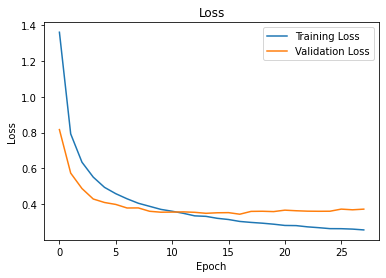

In [15]:
import seaborn as sns
plt.plot(r.history['loss'], label = 'Training Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend();

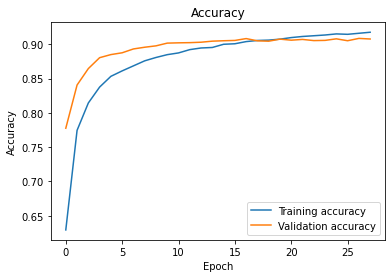

In [16]:
plt.plot(r.history['accuracy'], label = 'Training accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend();